___

<a href='https://akademie.datamics.com/kursliste/'><img src='bg_datamics_top.png'/></a>
___
<center><em>© Datamics</em></center>
<center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# Keras Syntax Grundlagen

In TensorFlow 2.0 stellt Keras jetzt die primäre API. Lasst uns ein einfaches Regressionsprojekt betrachten, um die Grundlagen der Keras-Syntax und des hinzufügens von Layern zu erklären.

## Der Datensatz

Zum Erlernen der wichtigsten Grundlagen der Syntax von Keras werden wir einen einfachen Satz falscher Daten verwenden, um dann in späteren Abschnitten mit echten Datensätzen und Featureerkennung zu arbeiten! Lasst uns nun zuerst die Syntax von TensorFlow 2.0 betrachten.

Lasst uns so tun als beinhalte dieser Datensatz Features (Eigenschaften) seltener Edelsteine, mit zwei Features und einem Verkaufspreis. Unser Ziel ist es, den Verkaufspreis eines gerade ausgegrabenen Edelsteines vorherzusagen, um ihn zu einem fairen Preis anbieten zu können.

### Datensatz laden

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Datensatz erkunden

Lasst uns einen schnellen Blick auf den Datensatz werfen: gibt es eine starke Korrelation zwischen den Features und dem "Preis" der generierten Daten?

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

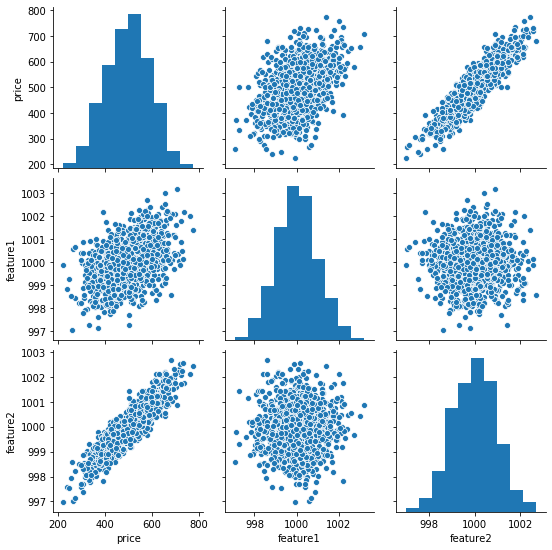

In [5]:
sns.pairplot(df)

Du kannst die Daten weiter visualisieren, da die Daten aber generiert sind, werden wir uns im Detail erst in späteren Abschnitten des Kurses mit Featureerkennug und Datenexploration beschäftigen!

### Test/Train Aufteilung

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalisierung und Skalierung der Daten

Wir skalieren die Daten der Features.

[Weshalb das Label nicht skaliert werden muss](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), de

In [14]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Optionen

Es gibt verschiedene Wege zum Import von Keras in TensorFlow (dies ist stark abhängig von persöhnlichen Vorlieben, bitte verwende die Methode, die dir am besten gefällt). Wir verwenden die Methode aus der **offiziellen TF Dokumentation**.

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.com

## Ein Modell erzeugen

Die TF2 Keras API bietet zwei Methoden zum erzeugen eines Modells. Übergib entweder eine Liste aller Layers auf einmal oder füge sie nacheinander hinzu.

Wir zeigen beide Methoden (verwende diejenige, die dir besser gefällt).

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Modell - als eine Liste von Layern

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Modell - Layer nach und nach hinzufügen

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Lasst uns fortfahren und ein einfaches Modell erst bauen und es dann, nach der Definition des Solvers (Bewertungsfunktion), kompilieren.

In [24]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Optimierer (Optimizer) und loss (Kostenfunktion)

Beachte, welche Art von Problem du lösen möchtest:

    # Für multiklassen-Klassifizierungsprobleme
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Für binäre Klassifizierungsprobleme
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Für ein  Regressionsproblem mit gemittelter quadratischer Abweichung (mean squared error)
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Es folgen einige gebräuchliche Definitionen, die nötig sind zum Verständnis der korrekten Verwendung von Keras:

* Sample (Stichprobe): ein Element eines Datensatzes.
    * Beispiel: ein Bild ist ein Sample eines Bilderkennungsmodells
    * Beispiel: eine Audiodatei ist ein Sample eines Spracherkennungsmodells
* Batch (Stapel): eine Menge von N Samples. Die Samples eines Batch werden unabhängig und prallel prozessiert. Im Training führt ein Batch zu genau einem Update des Modells. Ein Batch bildet die Verteilung der Eingabedaten besser ab als ein einzelnes Bild. Je größer das Batch, desto besser die Abbildung; das Prozessieren des Batches dauert aber entsprechend länger und führt nur zu einem Update. Für die Evaluierung und Vorhersagen ist es empfehlenswert, die maximale vom RAM erlaubte Batchgröße zu wählen (dies ermöglicht eine schnellere Evaluierung und Vorhersage).
* Epoche (Epoch): ein willkürlicher Abschnitt, allgemein definiert als "ein Durchlauf des gesamten Datensatzes", wird verwendet um das Training in verschiedene Phasen aufzuteilen, was hilfreich ist für Logging und periodische Evaluation.
* Wenn validation_data oder validation_split mit den Anpassungsmethoden der Keras-Modelle verwendet werden, wird die Evaluation am Ende jeder Epoche ausgeführt.
* Keras erlaubt es, spezifische  Callbacks zu entwerfen, die am Ende jeder Epoche ausgeführt werden. Beispiele dafür sind Änderungen der Lernrate und Modellcheckpoints (speichern).

In [25]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 3s 4ms/sample - loss: 256294.9760
Epoch 2/250
700/700 [==============================] - 0s 93us/sample - loss: 256062.9779
Epoch 3/250
700/700 [==============================] - 0s 103us/sample - loss: 255826.6179
Epoch 4/250
700/700 [==============================] - 0s 107us/sample - loss: 255567.7053
Epoch 5/250
700/700 [==============================] - 0s 99us/sample - loss: 255283.8064
Epoch 6/250
700/700 [==============================] - 0s 121us/sample - loss: 254972.2537
Epoch 7/250
700/700 [==============================] - 0s 107us/sample - loss: 254631.7743
Epoch 8/250
700/700 [==============================] - 0s 102us/sample - loss: 254258.1956
Epoch 9/250
700/700 [==============================] - 0s 109us/sample - loss: 253849.9068
Epoch 10/250
700/700 [==============================] - 0s 104us/sample - loss: 253410.8067
Epoch 11/250
700/700 [==============================] - 0s 108us/sample 

700/700 [==============================] - 0s 89us/sample - loss: 172.6132
Epoch 182/250
700/700 [==============================] - 0s 98us/sample - loss: 162.8047
Epoch 183/250
700/700 [==============================] - 0s 83us/sample - loss: 154.9321
Epoch 184/250
700/700 [==============================] - 0s 100us/sample - loss: 146.8308
Epoch 185/250
700/700 [==============================] - 0s 91us/sample - loss: 139.4733
Epoch 186/250
700/700 [==============================] - 0s 92us/sample - loss: 132.0747
Epoch 187/250
700/700 [==============================] - 0s 90us/sample - loss: 123.8058
Epoch 188/250
700/700 [==============================] - 0s 89us/sample - loss: 116.8675
Epoch 189/250
700/700 [==============================] - 0s 84us/sample - loss: 109.3235
Epoch 190/250
700/700 [==============================] - 0s 76us/sample - loss: 103.0903
Epoch 191/250
700/700 [==============================] - 0s 98us/sample - loss: 97.6921
Epoch 192/250
700/700 [============

## Evaluation

Lasst uns die Ergebnisse unsereses Trainings- und Testdatensatzes evaluieren. Wir vergleichen deren Ergebnisse und überprüfen, ob ein Overfitting (Überanpassung) vorliegt.

In [26]:
model.history.history

{'loss': [256294.97598214285,
  256062.97785714286,
  255826.61785714285,
  255567.70526785715,
  255283.80642857144,
  254972.25375,
  254631.7742857143,
  254258.195625,
  253849.9067857143,
  253410.80669642857,
  252935.26973214286,
  252417.12080357142,
  251858.5880357143,
  251260.4630357143,
  250616.83607142858,
  249928.53535714286,
  249187.82125,
  248398.94553571427,
  247561.35455357144,
  246666.76517857143,
  245720.40169642857,
  244714.5488392857,
  243645.72553571427,
  242511.76160714286,
  241319.193125,
  240064.5680357143,
  238735.79401785714,
  237330.27642857144,
  235865.85580357144,
  234323.43267857144,
  232707.63098214284,
  231007.20089285713,
  229231.6961607143,
  227370.92991071427,
  225418.18267857144,
  223393.17669642856,
  221290.36053571428,
  219091.638125,
  216812.42866071427,
  214434.649375,
  211963.83196428572,
  209402.61669642857,
  206731.98598214285,
  203981.84660714286,
  201147.97544642858,
  198191.77080357142,
  195146.5142857142

In [27]:
loss = model.history.history['loss']

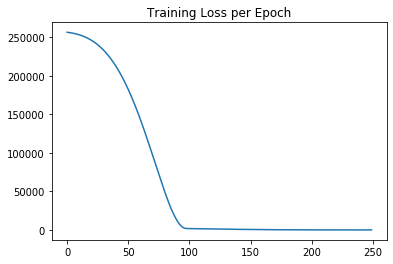

In [28]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Vergleiche die finale Evaluation (MSE) des Trainings- und Testdatensatzes

Diese sollten hoffentlich ziemlich nahe beieinander liegen.

In [29]:
model.metrics_names

['loss']

In [30]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [31]:
training_score

23.87001685006278

In [32]:
test_score

24.97322573343913

### Weitere Evaluationen

In [33]:
test_predictions = model.predict(X_test)

In [34]:
test_predictions

array([[405.31177],
       [623.4474 ],
       [592.028  ],
       [572.2245 ],
       [366.7808 ],
       [579.1285 ],
       [515.1358 ],
       [459.0537 ],
       [549.25336],
       [447.46234],
       [611.6967 ],
       [548.7719 ],
       [419.12402],
       [408.9185 ],
       [651.00824],
       [437.27032],
       [508.31958],
       [659.9247 ],
       [662.5156 ],
       [565.42725],
       [334.34964],
       [444.84286],
       [382.6067 ],
       [378.78564],
       [566.5415 ],
       [610.5708 ],
       [532.3646 ],
       [427.8592 ],
       [655.4077 ],
       [414.0514 ],
       [442.59204],
       [485.10794],
       [438.41016],
       [681.7812 ],
       [424.6904 ],
       [417.75354],
       [501.76895],
       [550.4117 ],
       [509.79507],
       [395.50046],
       [618.47504],
       [416.6092 ],
       [604.3452 ],
       [445.87473],
       [501.96317],
       [581.5133 ],
       [668.7876 ],
       [490.33325],
       [318.5915 ],
       [485.41934],


In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [36]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [37]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [38]:
test_predictions

0      405.311768
1      623.447388
2      592.028015
3      572.224487
4      366.780792
          ...    
295    529.056580
296    515.494873
297    609.552856
298    416.913666
299    410.941589
Length: 300, dtype: float32

In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [40]:
pred_df.columns = ['Test Y','Model Predictions']

In [41]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.311768
1,624.156198,623.447388
2,582.455066,592.028015
3,578.588606,572.224487
4,371.224104,366.780792
...,...,...
295,525.704657,529.056580
296,502.909473,515.494873
297,612.727910,609.552856
298,417.569725,416.913666


Lasst uns das mit den echten Testlabels vergleichen!

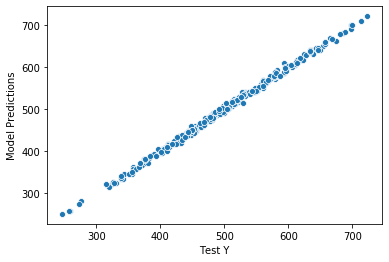

In [42]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [43]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

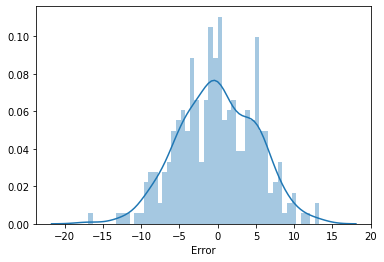

In [44]:
sns.distplot(pred_df['Error'],bins=50)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.004469078419812

In [47]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

24.973229161017553

In [48]:
# Essentially the same thing, difference just due to precision
test_score

24.97322573343913

In [49]:
#RMSE
test_score**0.5

4.997321856098437

# Vorhersage von neuen Daten

Was ist, wenn wir einen neuen Edelstein ausgraben? Welchen Preis sollte er haben? Dies ist der **gleiche** Vorgang wie die Vorhersage neuer Testdaten!

In [50]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [51]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [52]:
new_gem = scaler.transform(new_gem)

In [53]:
model.predict(new_gem)

array([[419.8144]], dtype=float32)

## Speichern und Laden eines Modelles

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [56]:
later_model = load_model('my_model.h5')

In [57]:
later_model.predict(new_gem)

array([[419.8144]], dtype=float32)

# Gut gemacht!